In [1]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [176]:
Xl =pd.ExcelFile(r'C:\Users\sunny\Desktop\DAC2\Paper\multiplexing.xlsx')

In [177]:
Xl.sheet_names

['Sheet6',
 'normal ',
 'original int',
 'analysis',
 'Sheet3',
 'Sheet4',
 'analysis 2',
 'Sheet5',
 'final values',
 'ANN',
 'original ',
 '5 Patient ',
 'Final_analysis',
 'Sheet2',
 'HGD Vs Others']

In [178]:
df= Xl.parse('Final_analysis')

In [179]:
df.head(5)

,case,age,site,SNAmax,SNAavg,CD44max,CD44avg,Sex,Habit,SiteT_SNAmax,SiteT_CD44Avg,SNAmaxAVG,SNAmax*Cd44max,SNAavg*CD44max,SNA_avg*CD44avg,disease,HP
0,mc335,48,Buccal_mucosa,22.54,12.57,14.27,7.08,Male,Habit_present,0.0,0.0,283.3278,321.6458,179.3739,88.9956,1,3
1,mc336,48,Buccal_mucosa,50.05,21.07,8.09,4.17,Male,Habit_present,0.0,0.0,1054.5535,404.9045,170.4563,87.8619,1,3
2,mc337,44,Buccal_mucosa,105.44,76.69,19.83,15.05,Male,Habit_present,0.0,0.0,8086.1936,2090.8752,1520.7627,1154.1845,1,4
3,mc338,57,Buccal_mucosa,61.49,26.41,19.97,10.57,Male,Habit_present,0.0,0.0,1623.9509,1227.9553,527.4077,279.1537,1,4
4,mc339,22,Buccal_mucosa,39.62,30.46,61.31,25.50,Female,Habit_present,0.0,0.0,1206.8252,2429.1022,1867.5026,776.7300,1,4


In [180]:
df.columns

Index(['case', 'age', 'site', 'SNAmax', 'SNAavg', 'CD44max', 'CD44avg', 'Sex ',
       'Habit', 'SiteT_SNAmax', 'SiteT_CD44Avg', 'SNAmaxAVG', 'SNAmax*Cd44max',
       'SNAavg*CD44max', 'SNA_avg*CD44avg', 'disease', 'HP'],
      dtype='object')

In [181]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,138.0,42.992754,12.683973,18.0000,33.000000,42.000000,53.000000,75.0000
SNAmax,138.0,25.756246,19.996123,1.4200,12.010000,18.843000,32.242500,105.4400
SNAavg,138.0,13.703319,11.729576,0.0000,6.855000,9.923000,17.452500,76.6900
CD44max,138.0,20.405928,17.087954,0.5700,6.254250,14.540000,32.950000,79.3300
CD44avg,138.0,10.800920,10.128286,0.0000,3.290250,6.990000,17.597500,67.6700
SiteT_SNAmax,138.0,4.376623,12.394091,0.0000,0.000000,0.000000,0.000000,66.9300
SiteT_CD44Avg,138.0,2.352065,8.001764,0.0000,0.000000,0.000000,0.000000,67.6700
SNAmaxAVG,138.0,558.462060,1033.573514,0.0000,92.048500,197.595150,520.819200,8086.1936
SNAmax*Cd44max,138.0,651.877893,933.096438,4.5885,93.334025,248.061150,786.720600,6251.6751
SNAavg*CD44max,138.0,358.847772,549.478566,0.0000,41.152000,145.180100,419.571004,4220.5317


In [182]:
df.isna().mean()

case               0.0
age                0.0
site               0.0
SNAmax             0.0
SNAavg             0.0
CD44max            0.0
CD44avg            0.0
Sex                0.0
Habit              0.0
SiteT_SNAmax       0.0
SiteT_CD44Avg      0.0
SNAmaxAVG          0.0
SNAmax*Cd44max     0.0
SNAavg*CD44max     0.0
SNA_avg*CD44avg    0.0
disease            0.0
HP                 0.0
dtype: float64

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 17 columns):
case               138 non-null object
age                138 non-null int64
site               138 non-null object
SNAmax             138 non-null float64
SNAavg             138 non-null float64
CD44max            138 non-null float64
CD44avg            138 non-null float64
Sex                138 non-null object
Habit              138 non-null object
SiteT_SNAmax       138 non-null float64
SiteT_CD44Avg      138 non-null float64
SNAmaxAVG          138 non-null float64
SNAmax*Cd44max     138 non-null float64
SNAavg*CD44max     138 non-null float64
SNA_avg*CD44avg    138 non-null float64
disease            138 non-null int64
HP                 138 non-null int64
dtypes: float64(10), int64(3), object(4)
memory usage: 18.5+ KB


In [184]:
df.disease.value_counts()

0    78
1    60
Name: disease, dtype: int64

In [185]:
df.HP.value_counts()

0    45
4    35
3    25
1    22
2    11
Name: HP, dtype: int64

In [186]:
df['Sex '].value_counts()

Male      81
Female    57
Name: Sex , dtype: int64

In [187]:
82/58

1.4137931034482758

In [188]:
df.Habit.value_counts()

Habit_present    73
No_Habit         65
Name: Habit, dtype: int64

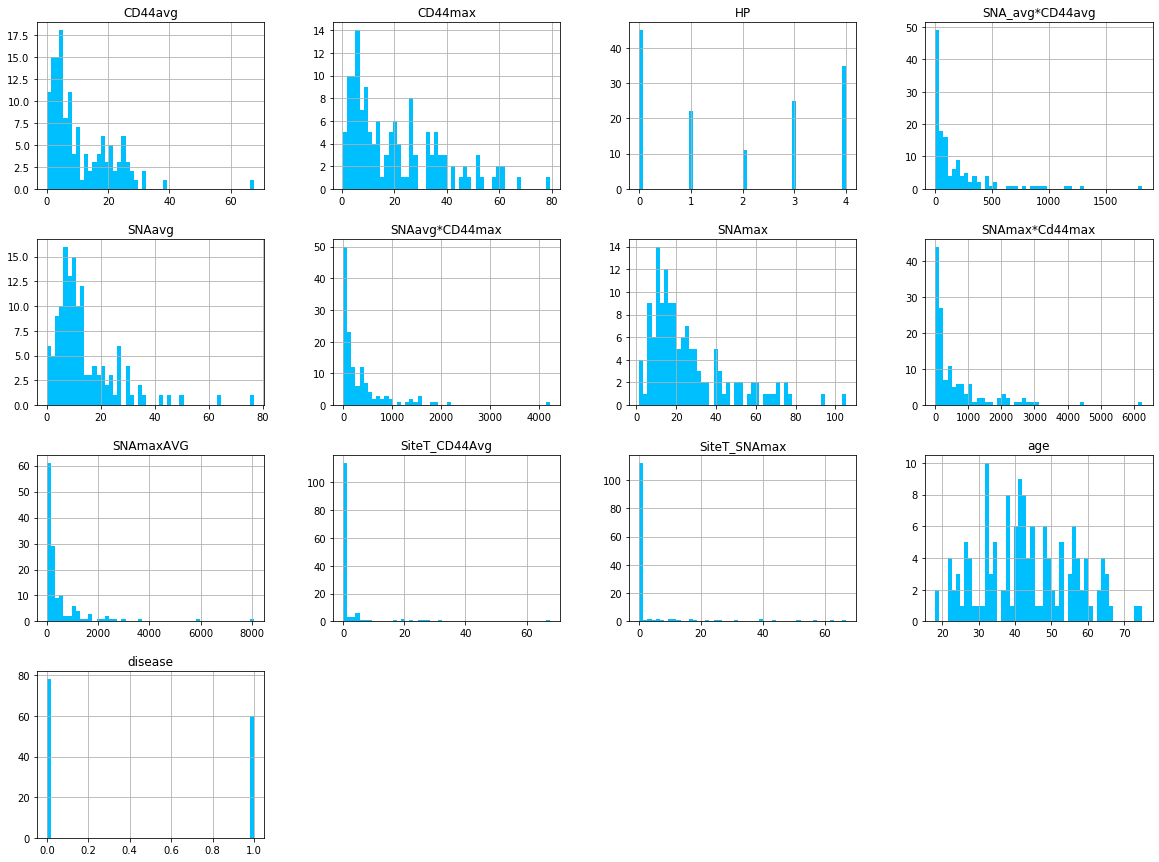

In [189]:
#Graph distribution
df.hist (bins=50, figsize=(20,15), color = 'deepskyblue')
plt.show()

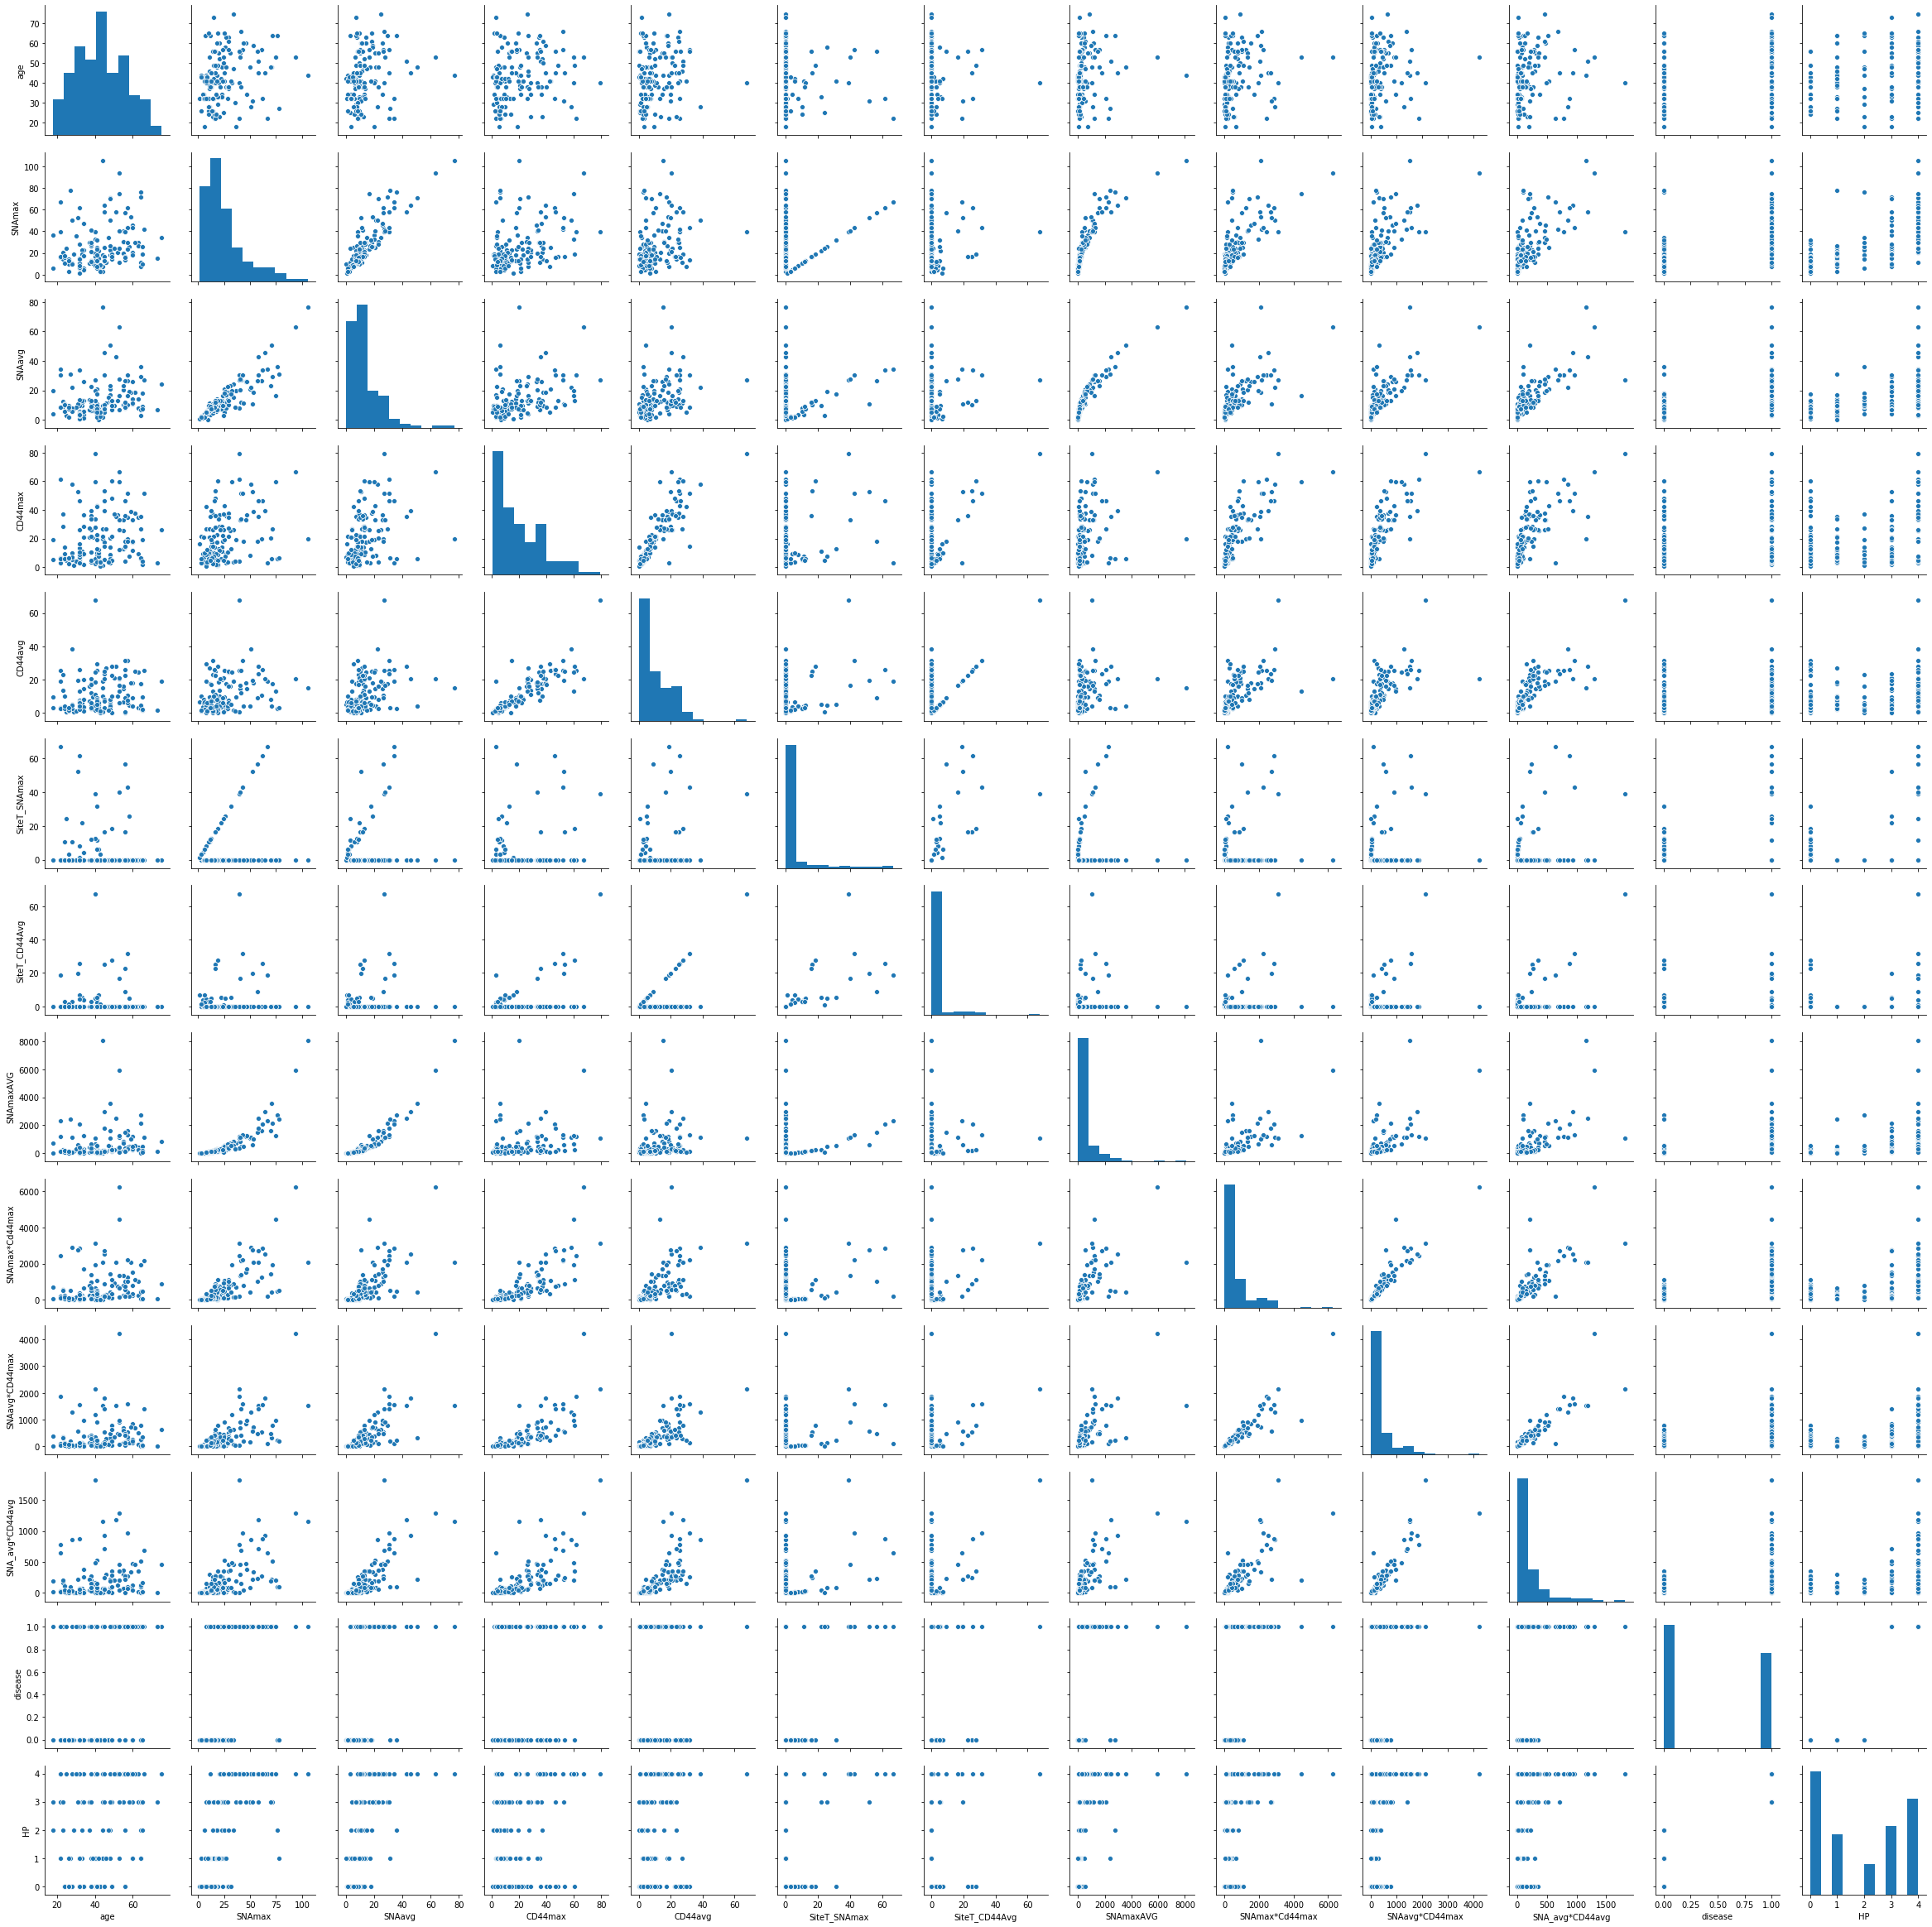

In [190]:
sns.pairplot(df)
plt.show()

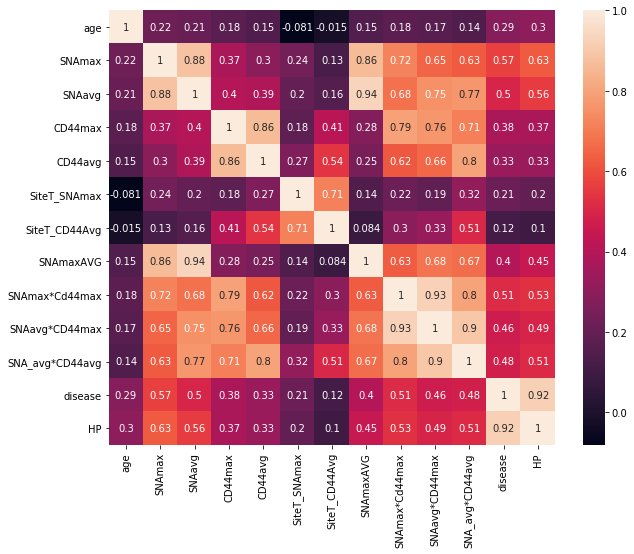

In [191]:
#Check Correlation 
plt.figure(figsize = (10,8))     # Size of the figure
ax= sns.heatmap(df.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [192]:
def continues_data(i):
    plt.figure(figsize= (6,4))
    ax= sns.boxplot(y= i, data =df, x ='disease')
    ##ax.set_yscale('log')
    ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
    plt.show

In [193]:
df.columns

Index(['case', 'age', 'site', 'SNAmax', 'SNAavg', 'CD44max', 'CD44avg', 'Sex ',
       'Habit', 'SiteT_SNAmax', 'SiteT_CD44Avg', 'SNAmaxAVG', 'SNAmax*Cd44max',
       'SNAavg*CD44max', 'SNA_avg*CD44avg', 'disease', 'HP'],
      dtype='object')

In [194]:
df.Habit.value_counts()

Habit_present    73
No_Habit         65
Name: Habit, dtype: int64

In [195]:
cont=['age', 'SNAmax', 'SNAavg', 'CD44max', 'CD44avg', 'SiteT_SNAmax', 'SiteT_CD44Avg', 'SNAmaxAVG', 'SNAmax*Cd44max',
       'SNAavg*CD44max', 'SNA_avg*CD44avg']

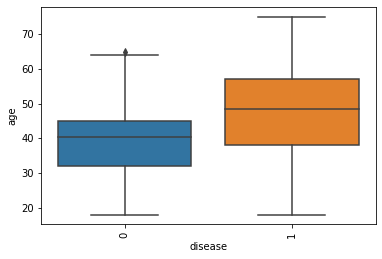

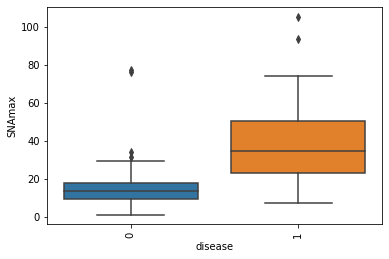

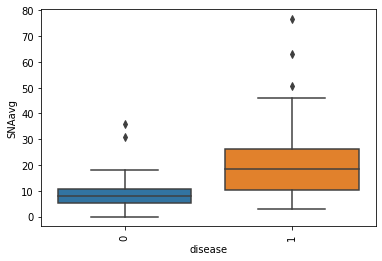

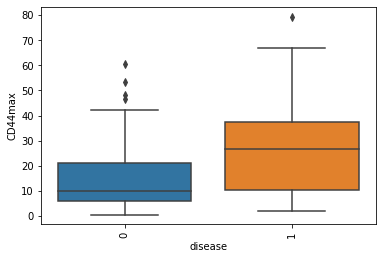

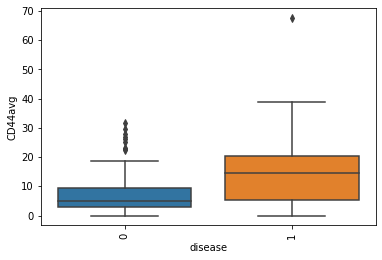

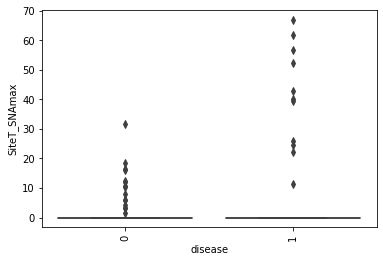

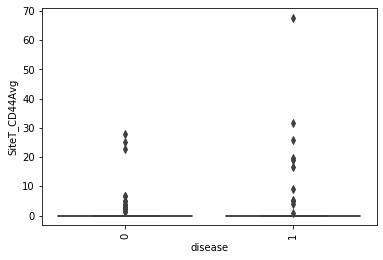

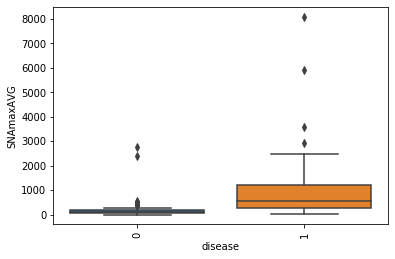

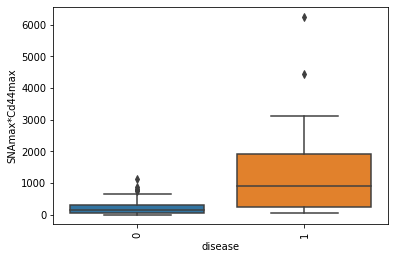

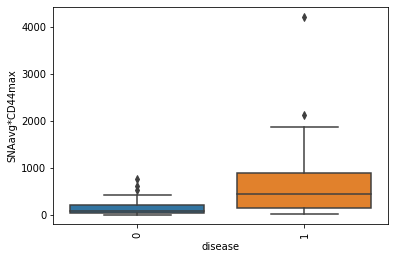

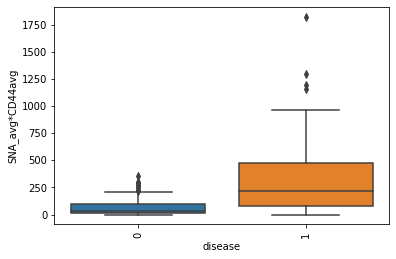

In [196]:
for i in (cont):
    continues_data(i)

In [197]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [198]:
#cap outliers in the numeric columns
df[cont] = df[cont].apply(cap_outliers, axis=0)

In [199]:
df.columns

Index(['case', 'age', 'site', 'SNAmax', 'SNAavg', 'CD44max', 'CD44avg', 'Sex ',
       'Habit', 'SiteT_SNAmax', 'SiteT_CD44Avg', 'SNAmaxAVG', 'SNAmax*Cd44max',
       'SNAavg*CD44max', 'SNA_avg*CD44avg', 'disease', 'HP'],
      dtype='object')

In [200]:
#Churn data into another column 
X= df.drop(['case','disease', 'HP'], axis =1)
y= df.disease

In [201]:
X.head(5)

,age,site,SNAmax,SNAavg,CD44max,CD44avg,Sex,Habit,SiteT_SNAmax,SiteT_CD44Avg,SNAmaxAVG,SNAmax*Cd44max,SNAavg*CD44max,SNA_avg*CD44avg
0,48,Buccal_mucosa,22.540000,12.570000,14.27,7.08,Male,Habit_present,0.0,0.0,283.327800,321.6458,179.3739,88.995600
1,48,Buccal_mucosa,50.050000,21.070000,8.09,4.17,Male,Habit_present,0.0,0.0,1054.553500,404.9045,170.4563,87.861900
2,44,Buccal_mucosa,85.744617,48.892048,19.83,15.05,Male,Habit_present,0.0,0.0,3659.182602,2090.8752,1520.7627,1075.968671
3,57,Buccal_mucosa,61.490000,26.410000,19.97,10.57,Male,Habit_present,0.0,0.0,1623.950900,1227.9553,527.4077,279.153700
4,22,Buccal_mucosa,39.620000,30.460000,61.31,25.50,Female,Habit_present,0.0,0.0,1206.825200,2429.1022,1867.5026,776.730000


In [202]:
dummy = pd.get_dummies(X[['Sex ','Habit', 'site']], drop_first =True)
X= pd.concat([X,dummy], axis =1)

In [203]:
X.shape

(138, 18)

In [204]:
X.columns

Index(['age', 'site', 'SNAmax', 'SNAavg', 'CD44max', 'CD44avg', 'Sex ',
       'Habit', 'SiteT_SNAmax', 'SiteT_CD44Avg', 'SNAmaxAVG', 'SNAmax*Cd44max',
       'SNAavg*CD44max', 'SNA_avg*CD44avg', 'Sex _Male', 'Habit_No_Habit',
       'site_Gingiva', 'site_Tongue'],
      dtype='object')

In [205]:
X=X.drop(['Sex ','site', 'Habit'], axis =1)

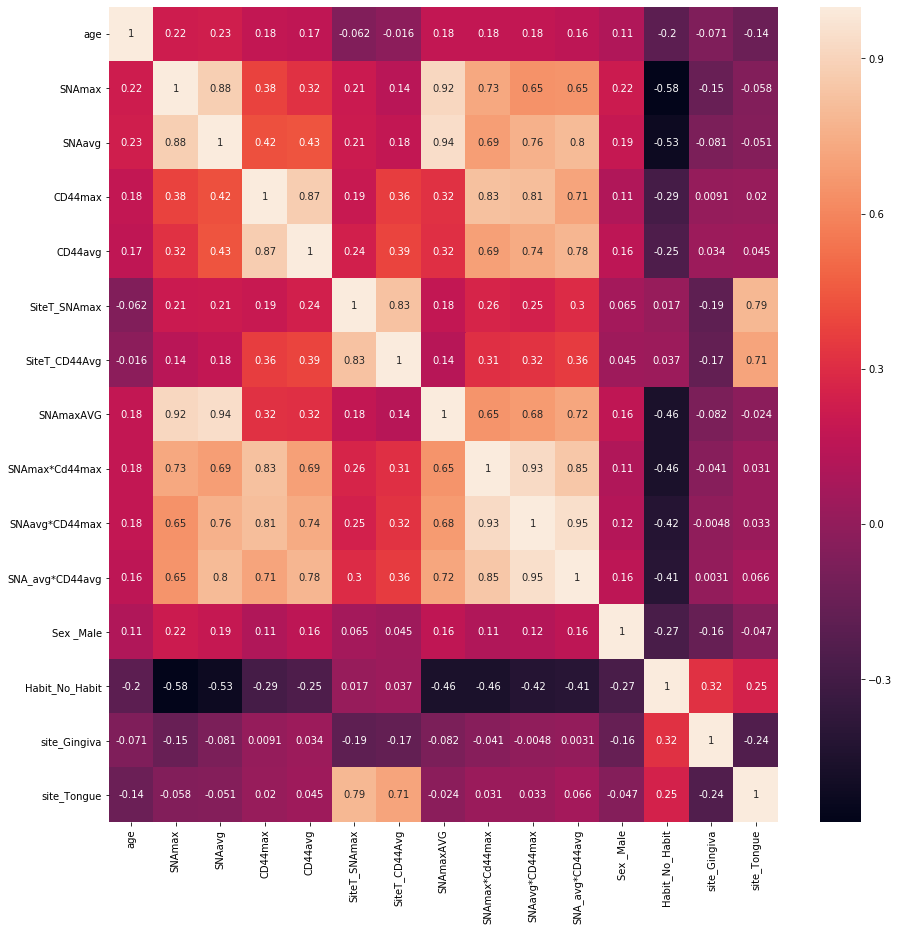

In [206]:
#Check Correlation 
plt.figure(figsize = (15,15))     # Size of the figure
ax= sns.heatmap(X.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [207]:
col= X.columns

In [208]:
col

Index(['age', 'SNAmax', 'SNAavg', 'CD44max', 'CD44avg', 'SiteT_SNAmax',
       'SiteT_CD44Avg', 'SNAmaxAVG', 'SNAmax*Cd44max', 'SNAavg*CD44max',
       'SNA_avg*CD44avg', 'Sex _Male', 'Habit_No_Habit', 'site_Gingiva',
       'site_Tongue'],
      dtype='object')

In [209]:
#Train_test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.40, random_state =100, stratify =y)

In [210]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(82, 15)
(82,)
(56, 15)
(56,)


# PCA = Dimension reduction

In [211]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [212]:
X_train[col]= scaler.fit_transform(X_train[col])
X_test[col]= scaler.transform(X_test[col])

In [213]:
X_train.head(5)

,age,SNAmax,SNAavg,CD44max,CD44avg,SiteT_SNAmax,SiteT_CD44Avg,SNAmaxAVG,SNAmax*Cd44max,SNAavg*CD44max,SNA_avg*CD44avg,Sex _Male,Habit_No_Habit,site_Gingiva,site_Tongue
9,-0.310519,0.071815,-0.073038,0.985280,0.770540,-0.406009,-0.364797,-0.214388,0.450000,0.325329,0.225574,0.779643,-0.952353,-0.492366,-0.511408
47,1.074152,1.708099,1.719723,-0.135890,-0.154316,3.492853,1.119363,1.782381,0.507021,0.453562,0.369466,0.779643,-0.952353,-0.492366,1.955385
81,2.381896,-0.581054,-0.650706,-1.064588,-0.935508,-0.406009,-0.364797,-0.570488,-0.733970,-0.765399,-0.709621,0.779643,-0.952353,-0.492366,-0.511408
71,1.074152,-0.625591,-0.185178,-0.365654,-1.117797,-0.406009,-0.364797,-0.489275,-0.531970,-0.404916,-0.767031,-1.282638,-0.952353,-0.492366,-0.511408
79,1.766487,-0.372123,-0.370233,-1.111032,-0.960721,-0.406009,-0.364797,-0.452420,-0.738388,-0.767063,-0.701492,0.779643,-0.952353,-0.492366,-0.511408


In [214]:
100 * y_train.value_counts(normalize =True, dropna =False)

0    56.097561
1    43.902439
Name: disease, dtype: float64

In [215]:
from sklearn.decomposition import PCA
pca= PCA(random_state= 100)

In [216]:
newdata= pca.fit_transform(X_train)

In [217]:
newdata=pd.DataFrame(newdata)

In [218]:
pc4= newdata.loc[: ,0: 9]
pc4.columns= ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
pc4.head(5)
print(pc4.shape)

(82, 10)


In [219]:
y_pc= pd.DataFrame(y_train)
y_pc.reset_index(drop=True, inplace=True)
pc4.reset_index(drop=True, inplace=True)

In [220]:
pc4= pd.concat([pc4, y_pc], axis =1,sort=None)
pc4.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,disease
0,0.866042,-0.811535,0.573215,-0.692035,-0.683138,-1.225971,0.285667,0.123876,0.079314,0.279411,1
1,3.437824,1.512050,-3.311146,0.558803,-0.298104,1.360180,0.683716,0.143847,-0.701642,0.458167,1
2,-1.514062,-1.401337,-1.275843,-2.087171,-0.052227,1.175844,0.860483,-0.097481,-0.229496,-0.423418,1
3,-1.291506,-0.817310,-0.525167,-0.964705,1.672783,0.207526,0.786991,-0.411217,0.057836,-0.294811,0
4,-1.422392,-1.406244,-1.376424,-1.540330,-0.120090,0.838092,0.713870,-0.204974,-0.116969,-0.325697,1


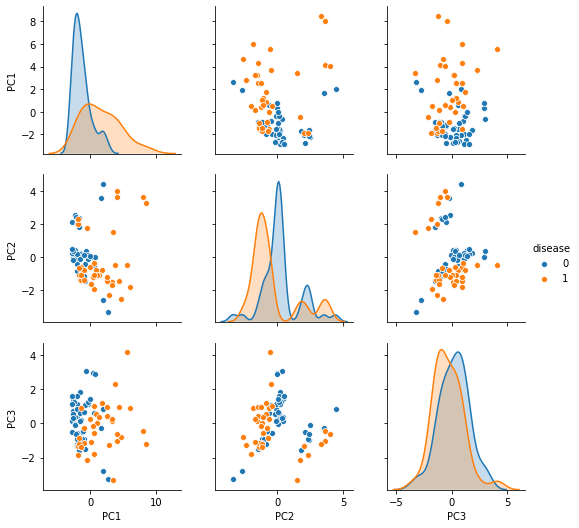

In [221]:
sns.pairplot(pc4,vars=['PC1', 'PC2', 'PC3'], hue ='disease')
plt.show()

In [222]:
pca.explained_variance_ratio_

array([4.34819006e-01, 1.73330097e-01, 1.23477210e-01, 6.84591937e-02,
       6.02719376e-02, 4.87431940e-02, 2.86046196e-02, 2.16814599e-02,
       1.30933770e-02, 1.05568103e-02, 8.22902649e-03, 5.60125826e-03,
       1.80583274e-03, 1.02780070e-03, 2.99176092e-04])

<BarContainer object of 15 artists>

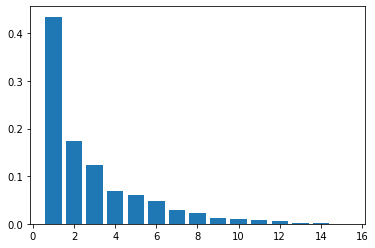

In [223]:
#PCA components 
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

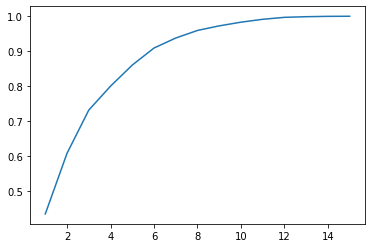

In [224]:
#Cum sum of Variance
#Screeplot Variation of data
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [225]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      43.48
1      60.81
2      73.16
3      80.01
4      86.04
5      90.91
6      93.77
7      95.94
8      97.25
9      98.30
10     99.13
11     99.69
12     99.87
13     99.97
14    100.00
dtype: float64


In [367]:
PCA_VARS =12
pc2 = PCA(n_components=PCA_VARS, random_state=100)
newdata = pc2.fit_transform(X_train)

In [368]:
#Class weight = balance is used for imbalanace data
steps = [("pca", PCA(n_components = PCA_VARS)), ("Logistic", LogisticRegression(class_weight= 'balanced'))]
pipeline = Pipeline(steps)

In [369]:
pipeline.fit(X_train, y_train)
pipeline.score(X_train, y_train)

0.9146341463414634

In [370]:
y_train_pred= pipeline.predict(X_train)

In [371]:
confusion= confusion_matrix(y_train,y_train_pred)
confusion

array([[40,  6],
       [ 1, 35]], dtype=int64)

In [372]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [373]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9722222222222222

In [374]:
# Let us calculate specificity
TN / float(TN+FP)

0.8695652173913043

In [375]:
#Predicting the test data
y_pred= pipeline.predict(X_test)

In [376]:
confusion= confusion_matrix(y_test,y_pred)
confusion

array([[26,  6],
       [ 3, 21]], dtype=int64)

In [377]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [378]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.875

In [379]:
# Let us calculate specificity
TN / float(TN+FP)

0.8125

In [380]:
accuracy= (TP+TN)/(TP+TN+FP+FN)
accuracy

0.8392857142857143

In [381]:
#Hyperparameter 

pca = PCA(random_state=100)

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [6,7,8,9,10,11,12,13,14,15,16, 17,18,19], 'logistic__C': [0.1,0.2,0.3,0.4, 0.5, 0.6, 0.8, 0.9,1,2,3,4,5,6,7,8,9,10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, return_train_score =True, scoring='roc_auc', n_jobs=-1, verbose=1)

In [382]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 2153 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:   10.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA(random_state=100)),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9,
                                         1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [6, 7, 8, 9, 10, 11, 12, 13, 14,
                                               15, 16, 17, 18, 19]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [383]:
scores = model.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006582,0.000489,0.0,0.0,0.1,l1,6,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,...,NaN,NaN,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.006383,0.001493,0.0,0.0,0.1,l1,7,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,...,NaN,NaN,378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.007380,0.001738,0.0,0.0,0.1,l1,8,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,...,NaN,NaN,377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.006782,0.000747,0.0,0.0,0.1,l1,9,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,...,NaN,NaN,376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.006183,0.000746,0.0,0.0,0.1,l1,10,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,...,NaN,NaN,375,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [384]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9726190476190476
Best hyperparameters:  {'logistic__C': 7, 'logistic__penalty': 'l2', 'pca__n_components': 11}


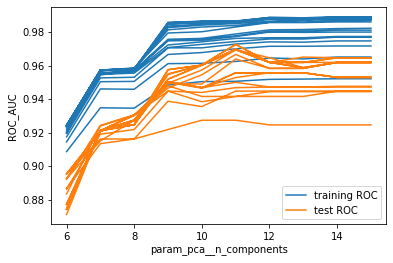

In [385]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_pca__n_components"], 
         scores["mean_train_score"], 
         label="training ROC")
plt.plot(scores["param_pca__n_components"], 
         scores["mean_test_score"], 
         label="test ROC")
plt.xlabel("param_pca__n_components")
plt.ylabel("ROC_AUC")
plt.legend()
plt.show()

In [386]:
y_train_pred= model.predict(X_train)

In [387]:
confusion= confusion_matrix(y_train,y_train_pred)
confusion

array([[42,  4],
       [ 3, 33]], dtype=int64)

In [388]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [389]:
accuracy= (TP+TN)/(TP+TN+FP+FN)
accuracy

0.9146341463414634

In [390]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9166666666666666

In [391]:
# Let us calculate specificity
TN / float(TN+FP)

0.9130434782608695

In [392]:
y_pred = model.predict(X_test)

In [393]:
confusion= confusion_matrix(y_test,y_pred)
confusion

array([[27,  5],
       [ 2, 22]], dtype=int64)

In [394]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [395]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9166666666666666

In [396]:
# Let us calculate specificity
TN / float(TN+FP)

0.84375

In [397]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy

0.875

# Validating model with HGD

In [398]:
X2 =pd.ExcelFile(r'C:\Users\sunny\Desktop\DAC2\Paper\multiplexing.xlsx')

In [399]:
X2.sheet_names

['Sheet6',
 'normal ',
 'original int',
 'analysis',
 'Sheet3',
 'Sheet4',
 'analysis 2',
 'Sheet5',
 'final values',
 'ANN',
 'original ',
 '5 Patient ',
 'Final_analysis',
 'Sheet2',
 'HGD Vs Others']

In [400]:
dfd= X2.parse('HGD Vs Others')

In [401]:
dfd.head(5)

,case,age,site,SNAmax,SNAavg,CD44max,CD44avg,Sex,Habit,SiteT_SNAmax,SiteT_CD44Avg,SNAmaxAVG,SNAmax*Cd44max,SNAavg*CD44max,SNA_avg*CD44avg,disease
0,mc335,48,Buccal_mucosa,22.54,12.57,14.27,7.08,Male,Habit_present,0.0,0.0,283.3278,321.6458,179.3739,88.9956,1
1,mc336,48,Buccal_mucosa,50.05,21.07,8.09,4.17,Male,Habit_present,0.0,0.0,1054.5535,404.9045,170.4563,87.8619,1
2,mc340,22,Buccal_mucosa,15.91,8.64,6.64,3.20,Male,Habit_present,0.0,0.0,137.4624,105.6424,57.3696,27.6480,1
3,mc341,60,Buccal_mucosa,45.81,25.88,32.92,18.13,Male,Habit_present,0.0,0.0,1185.5628,1508.0652,851.9696,469.2044,1
4,mc342,29,Buccal_mucosa,18.90,7.29,1.14,0.50,Male,Habit_present,0.0,0.0,137.7810,21.5460,8.3106,3.6450,0


In [402]:
cont=['age', 'SNAmax', 'SNAavg', 'CD44max', 'CD44avg', 'SiteT_SNAmax', 'SiteT_CD44Avg', 'SNAmaxAVG', 'SNAmax*Cd44max',
       'SNAavg*CD44max', 'SNA_avg*CD44avg']

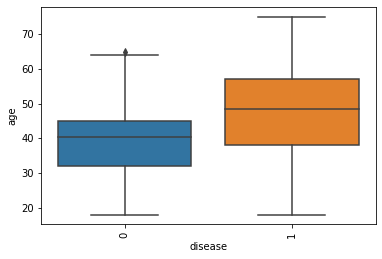

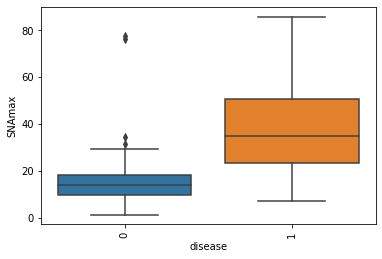

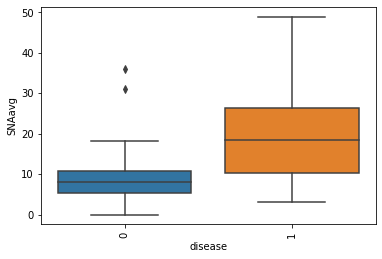

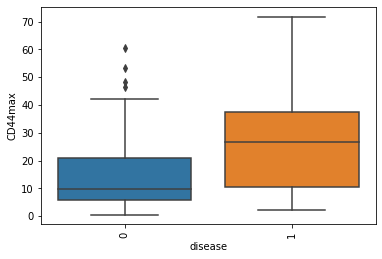

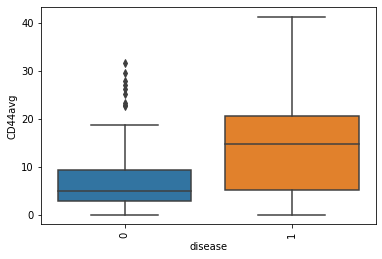

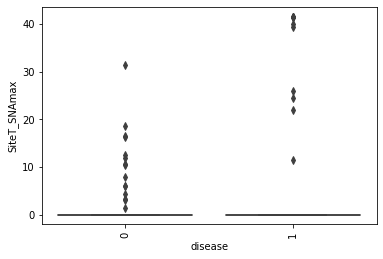

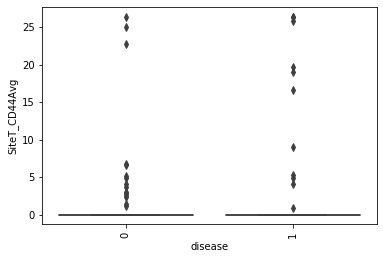

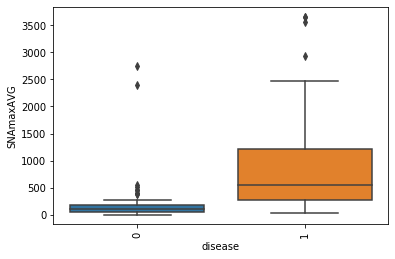

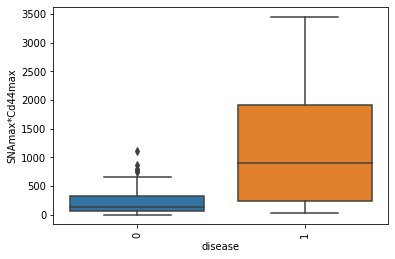

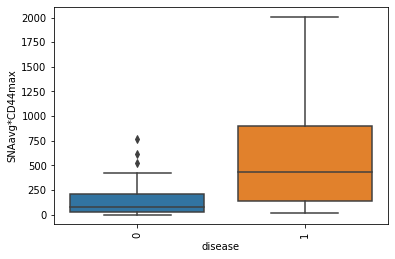

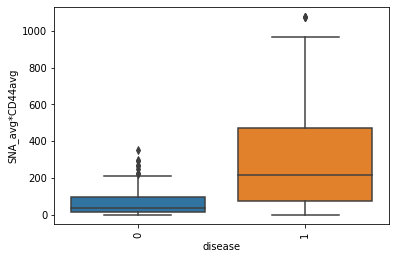

In [403]:
for i in (cont):
    continues_data(i)

In [404]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [405]:
#cap outliers in the numeric columns
dfd[cont] = df[cont].apply(cap_outliers, axis=0)

In [406]:
dfd.shape

(103, 16)

In [407]:
dfd.columns

Index(['case', 'age', 'site', 'SNAmax', 'SNAavg', 'CD44max', 'CD44avg', 'Sex ',
       'Habit', 'SiteT_SNAmax', 'SiteT_CD44Avg', 'SNAmaxAVG', 'SNAmax*Cd44max',
       'SNAavg*CD44max', 'SNA_avg*CD44avg', 'disease'],
      dtype='object')

In [408]:
#Churn data into another column 
Xd= dfd.drop(['case','disease'], axis =1)
yd= dfd.disease

In [409]:
dummy = pd.get_dummies(Xd[['Sex ','Habit', 'site']], drop_first =True)
Xd= pd.concat([Xd,dummy], axis =1)

In [410]:
Xd=Xd.drop(['Sex ','site', 'Habit'], axis =1)

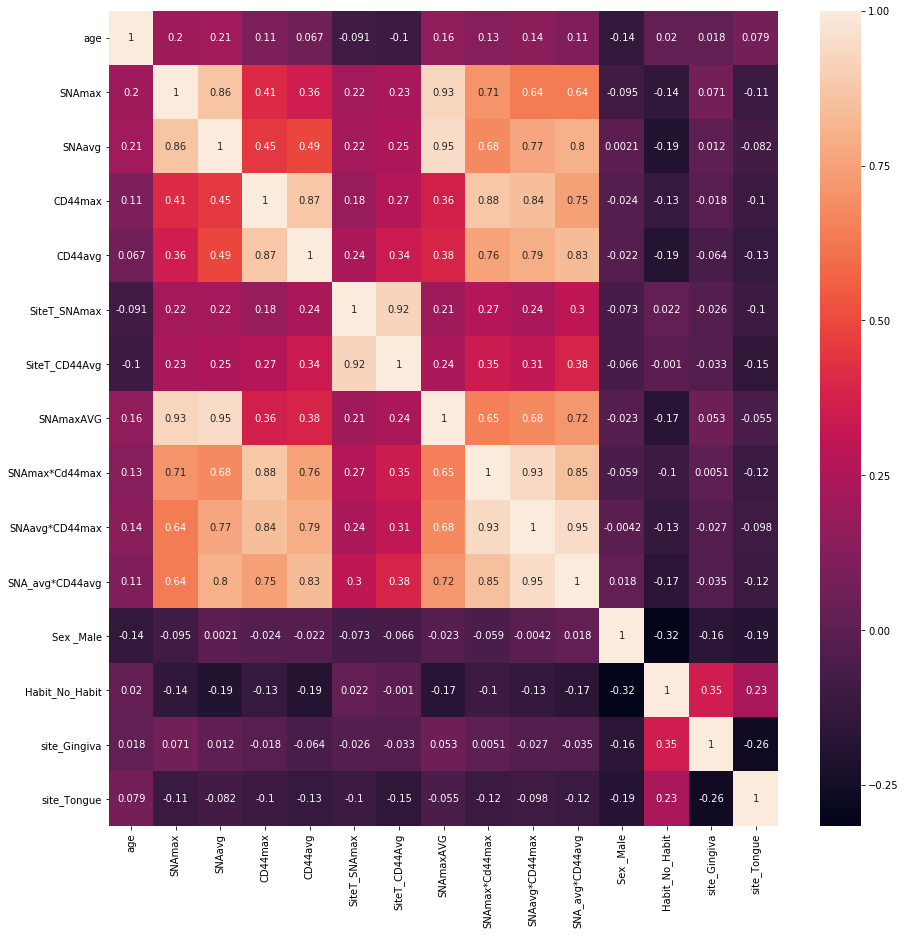

In [411]:
#Check Correlation 
plt.figure(figsize = (15,15))     # Size of the figure
ax= sns.heatmap(Xd.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [412]:
col = Xd.columns

In [413]:
Xd[col]= scaler.transform(Xd[col])

In [414]:
y_hd = model.predict(Xd)

In [415]:
confusion= confusion_matrix(dfd.disease,y_hd)
confusion

array([[52, 26],
       [ 6, 19]], dtype=int64)

In [416]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [417]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.76

In [418]:
# Let us calculate specificity
TN / float(TN+FP)

0.6666666666666666

## Random Forest

In [1004]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 8, 1)}

# instantiate the model
rf = RandomForestClassifier(class_weight= 'balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                    return_train_score =True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': range(2, 8)}, return_train_score=True,
             scoring='accuracy')

In [1005]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.100215,0.007902,0.004720,0.006266,2,{'max_depth': 2},0.705882,0.882353,0.764706,0.764706,...,0.773529,0.058529,5,0.880597,0.910448,0.910448,0.895522,0.897059,0.898815,0.011104
1,0.113446,0.008521,0.012058,0.004994,3,{'max_depth': 3},0.764706,0.764706,0.764706,0.882353,...,0.772794,0.062409,6,0.955224,0.940299,0.985075,0.955224,0.955882,0.958341,0.014599
2,0.107531,0.009938,0.007039,0.001636,4,{'max_depth': 4},0.764706,0.941176,0.823529,0.823529,...,0.820588,0.067327,1,0.955224,0.985075,1.000000,0.985075,0.985294,0.982133,0.014633
3,0.105915,0.007008,0.012978,0.003289,5,{'max_depth': 5},0.764706,0.882353,0.705882,0.882353,...,0.797059,0.072284,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.123486,0.015621,0.009373,0.012498,6,{'max_depth': 6},0.764706,0.882353,0.764706,0.882353,...,0.808824,0.060276,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


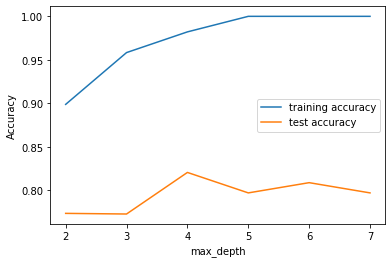

In [1006]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [1007]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(2,100, 5)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight= 'balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                   return_train_score =True)
rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4),
             param_grid={'n_estimators': range(2, 100, 5)},
             return_train_score=True, scoring='accuracy')

In [1008]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.006320,0.001240,0.002337,0.000463,2,{'n_estimators': 2},0.678571,0.785714,0.857143,0.773810,0.073386,20,0.892857,0.964286,0.928571,0.928571,0.029161
1,0.015970,0.005864,0.003315,0.001262,7,{'n_estimators': 7},0.785714,0.785714,0.821429,0.797619,0.016836,14,0.964286,0.982143,1.000000,0.982143,0.014580
2,0.025930,0.001598,0.004972,0.000830,12,{'n_estimators': 12},0.750000,0.821429,0.821429,0.797619,0.033672,14,0.928571,0.982143,0.982143,0.964286,0.025254
3,0.020623,0.001208,0.003986,0.000802,17,{'n_estimators': 17},0.750000,0.821429,0.821429,0.797619,0.033672,14,0.946429,0.982143,1.000000,0.976190,0.022272
4,0.026609,0.004504,0.003311,0.000451,22,{'n_estimators': 22},0.857143,0.785714,0.821429,0.821429,0.029161,4,0.982143,1.000000,0.964286,0.982143,0.014580


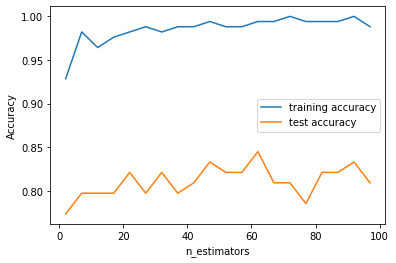

In [1009]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [1013]:
#Maximum Features
# specify number of folds for k-fold CV
n_folds =3

# parameters to build the model on
parameters = {'max_features': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4, class_weight= 'balanced',n_estimators =60)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score =True)
rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, n_estimators=60),
             param_grid={'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20]},
             return_train_score=True, scoring='accuracy')

In [1014]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.068495,0.000479,0.005979,0.001404,2,{'max_features': 2},0.750000,0.821429,0.821429,0.797619,3.367175e-02,10,0.982143,1.000000,0.982143,0.988095,0.008418
1,0.060838,0.000815,0.005651,0.000940,3,{'max_features': 3},0.750000,0.750000,0.821429,0.773810,3.367175e-02,14,0.982143,1.000000,1.000000,0.994048,0.008418
2,0.094026,0.033988,0.012130,0.005929,4,{'max_features': 4},0.821429,0.785714,0.821429,0.809524,1.683588e-02,7,1.000000,1.000000,0.982143,0.994048,0.008418
3,0.135142,0.005778,0.011712,0.002830,5,{'max_features': 5},0.821429,0.821429,0.821429,0.821429,1.110223e-16,4,1.000000,0.982143,1.000000,0.994048,0.008418
4,0.163550,0.015697,0.014579,0.002623,6,{'max_features': 6},0.785714,0.821429,0.785714,0.797619,1.683588e-02,10,0.982143,1.000000,1.000000,0.994048,0.008418


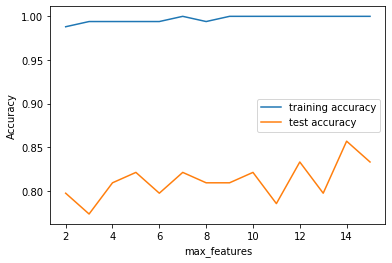

In [1015]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [1016]:
## GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 10, 1)}

# instantiate the model
rf = RandomForestClassifier(max_depth=4, class_weight= 'balanced',n_estimators =50,max_features =15 )


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score =True)
rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, max_features=15,
                                              n_estimators=50),
             param_grid={'min_samples_leaf': range(1, 10)},
             return_train_score=True, scoring='accuracy')

In [1017]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.049925,0.008600,0.006870,0.006514,1,{'min_samples_leaf': 1},0.857143,0.785714,0.892857,0.845238,0.044544,1,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.061679,0.016554,0.010415,0.007365,2,{'min_samples_leaf': 2},0.857143,0.785714,0.821429,0.821429,0.029161,2,0.982143,1.000000,0.982143,0.988095,0.008418
2,0.064695,0.003094,0.002181,0.003084,3,{'min_samples_leaf': 3},0.750000,0.714286,0.821429,0.761905,0.044544,8,0.910714,0.964286,0.982143,0.952381,0.030351
3,0.059942,0.004655,0.006876,0.006512,4,{'min_samples_leaf': 4},0.785714,0.714286,0.964286,0.821429,0.105140,2,0.928571,0.946429,0.946429,0.940476,0.008418
4,0.066748,0.003015,0.005207,0.007364,5,{'min_samples_leaf': 5},0.750000,0.714286,0.821429,0.761905,0.044544,8,0.910714,0.946429,0.928571,0.928571,0.014580


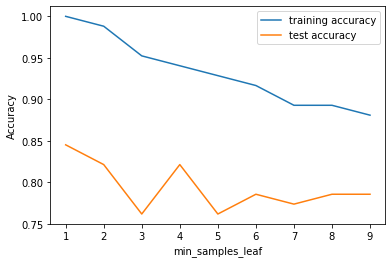

In [1018]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [1019]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(2, 15, 2)}

# instantiate the model
rf = RandomForestClassifier(max_depth=4, class_weight= 'balanced',n_estimators =50,max_features =15,min_samples_leaf =4 )


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",  return_train_score =True)
rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, max_features=15,
                                              min_samples_leaf=4,
                                              n_estimators=50),
             param_grid={'min_samples_split': range(2, 15, 2)},
             return_train_score=True, scoring='accuracy')

In [1020]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.054535,0.005527,0.002660,0.001881,2,{'min_samples_split': 2},0.821429,0.714286,0.857143,0.797619,0.060703,1,0.892857,0.964286,0.910714,0.922619,0.030351
1,0.053247,0.007625,0.000000,0.000000,4,{'min_samples_split': 4},0.750000,0.714286,0.821429,0.761905,0.044544,6,0.892857,0.946429,0.964286,0.934524,0.030351
2,0.055433,0.005126,0.003981,0.000012,6,{'min_samples_split': 6},0.785714,0.750000,0.857143,0.797619,0.044544,1,0.910714,0.946429,0.982143,0.946429,0.029161
3,0.052193,0.000519,0.003975,0.000038,8,{'min_samples_split': 8},0.750000,0.714286,0.821429,0.761905,0.044544,6,0.928571,0.964286,0.982143,0.958333,0.022272
4,0.053190,0.000463,0.004974,0.000018,10,{'min_samples_split': 10},0.785714,0.750000,0.821429,0.785714,0.029161,4,0.910714,0.946429,0.910714,0.922619,0.016836


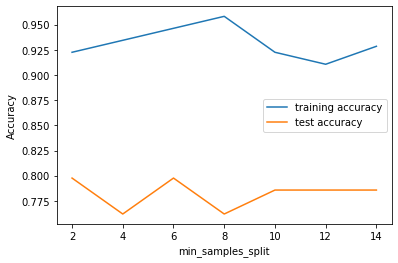

In [1021]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [165]:
# Create the parameter grid based on the results of random search 
#max_depth=4, class_weight= 'balanced',n_estimators =50,max_features =15,min_samples_leaf =6
param_grid = {
    'max_depth': [3,4,5,6],
    'min_samples_leaf': range(3,8,1),
    'min_samples_split': range(3,8,1),
    'n_estimators': [10,15,20,30,40,50,60,80], 
    'max_features': [8,10,12,14,15,18,20,22]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6400 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 1290 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 2690 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 4490 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6690 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 9290 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 12290 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 15690 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 19200 out of 19200 | elapsed:  5.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [8, 10, 12, 14, 15, 18, 20, 22],
                         'min_samples_leaf': range(3, 8),
                         'min_samples_split': range(3, 8),
                         'n_estimators': [10, 15, 20, 30, 40, 50, 60, 80]},
             verbose=1)

In [166]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8873106060606061 using {'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 15}


In [419]:
# model with the best hyperparameters
#max_depth=4, class_weight= 'balanced',n_estimators =50,max_features =15,min_samples_leaf =4 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight= 'balanced', bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=10, 
                             min_samples_split=6,
                             max_features= 15,
                             n_estimators=50, random_state =100)

In [420]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=15,
                       min_samples_leaf=10, min_samples_split=6,
                       n_estimators=50, random_state=100)

In [421]:
y_train_pred= rfc.predict(X_train)

In [422]:
confusion= confusion_matrix(y_train,y_train_pred)
confusion

array([[41,  5],
       [ 6, 30]], dtype=int64)

In [423]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [424]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8333333333333334

In [425]:
# Let us calculate specificity
TN / float(TN+FP)

0.8913043478260869

In [426]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy

0.8658536585365854

In [427]:
# predict test data 
predictions = rfc.predict(X_test)

In [428]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        32
           1       0.88      0.88      0.88        24

    accuracy                           0.89        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.89      0.89      0.89        56



In [429]:
confusion = (confusion_matrix(y_test,predictions))
print (confusion)

[[29  3]
 [ 3 21]]


In [430]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [431]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.875

In [432]:
# Let us calculate specificity
TN / float(TN+FP)

0.90625

In [433]:
# Let's check the overall accuracy.
from sklearn import metrics
# Let's check the overall accuracy.
metrics.accuracy_score(y_test,predictions)

0.8928571428571429

In [434]:
feature_importance = pd.concat([pd.DataFrame(X.columns, columns = ['variable']),
           pd.DataFrame(rfc.feature_importances_, columns = ['importance'])],
          axis = 1).sort_values(by = 'importance', ascending = False)
feature_importance 

,variable,importance
1,SNAmax,0.438859
12,Habit_No_Habit,0.359024
8,SNAmax*Cd44max,0.073547
3,CD44max,0.044262
9,SNAavg*CD44max,0.026909
7,SNAmaxAVG,0.023457
4,CD44avg,0.010828
0,age,0.009247
10,SNA_avg*CD44avg,0.006471
2,SNAavg,0.003647


# SVM

In [1110]:
model = SVC(C = 1, class_weight= 'balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [1111]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[23,  9],
       [ 2, 22]], dtype=int64)

In [1112]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.8035714285714286
precision 0.7096774193548387
recall 0.9166666666666666


In [1113]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel='rbf', class_weight= 'balanced')

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.1s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=SVC(class_weight='balanced'),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [1114]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.003325,0.000471,0.001655,0.000467,1,0.01,"{'C': 1, 'gamma': 0.01}",0.857143,0.750000,0.857143,0.821429,0.050508,3,0.821429,0.910714,0.803571,0.845238,0.046869
1,0.002992,0.000001,0.001340,0.000486,1,0.001,"{'C': 1, 'gamma': 0.001}",0.857143,0.785714,0.642857,0.761905,0.089087,10,0.767857,0.714286,0.803571,0.761905,0.036693
2,0.002327,0.000469,0.001662,0.000470,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.464286,0.642857,0.464286,0.523810,0.084179,12,0.410714,0.535714,0.410714,0.452381,0.058926
3,0.002990,0.000003,0.001980,0.000798,10,0.01,"{'C': 10, 'gamma': 0.01}",0.892857,0.714286,0.857143,0.821429,0.077152,3,0.875000,0.946429,0.875000,0.898810,0.033672
4,0.002653,0.000479,0.001465,0.000654,10,0.001,"{'C': 10, 'gamma': 0.001}",0.857143,0.714286,0.857143,0.809524,0.067344,6,0.803571,0.910714,0.803571,0.839286,0.050508
5,0.002328,0.000470,0.001662,0.000469,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.785714,0.785714,0.678571,0.750000,0.050508,11,0.732143,0.714286,0.750000,0.732143,0.014580
6,0.000650,0.000920,0.000352,0.000498,100,0.01,"{'C': 100, 'gamma': 0.01}",0.892857,0.714286,0.785714,0.797619,0.073386,8,1.000000,0.946429,0.982143,0.976190,0.022272
7,0.000000,0.000000,0.005223,0.007386,100,0.001,"{'C': 100, 'gamma': 0.001}",0.892857,0.714286,0.892857,0.833333,0.084179,1,0.857143,0.946429,0.875000,0.892857,0.038576
8,0.005207,0.007364,0.000000,0.000000,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.857143,0.714286,0.857143,0.809524,0.067344,6,0.803571,0.910714,0.785714,0.833333,0.055200
9,0.000000,0.000000,0.000000,0.000000,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.857143,0.750000,0.785714,0.797619,0.044544,8,1.000000,1.000000,0.982143,0.994048,0.008418


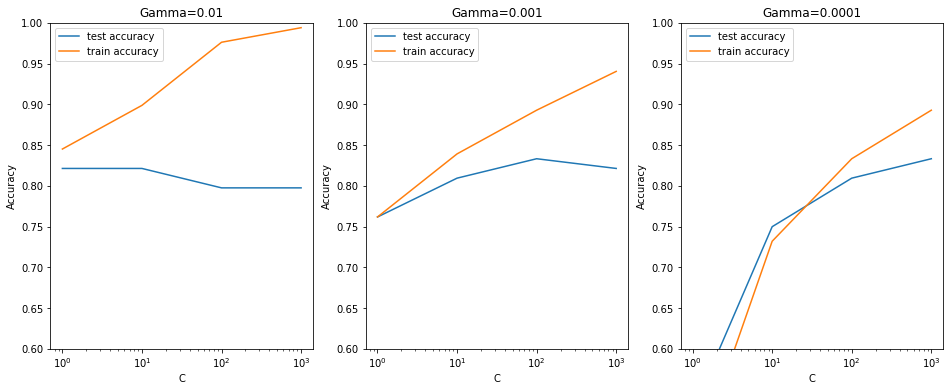

In [1115]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [481]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8677398989898991 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


In [435]:
# specify optimal hyperparameters
best_params = {"C": 10, "gamma": 0.01, "kernel":"rbf"}

# model
model = SVC(C=10, gamma=0.01, kernel='rbf', class_weight= 'balanced')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("Precision", metrics.precision_score(y_test, y_pred))
print("recall", metrics.recall_score(y_test, y_pred))

[[24  8]
 [ 2 22]] 

accuracy 0.8214285714285714
Precision 0.7333333333333333
recall 0.9166666666666666


In [436]:
y_train_pred= model.predict(X_train)

In [437]:
confusion= confusion_matrix(y_train,y_train_pred)
confusion

array([[38,  8],
       [ 1, 35]], dtype=int64)

In [438]:
metrics.accuracy_score(y_train,y_train_pred)

0.8902439024390244

In [439]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [440]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9722222222222222

In [441]:
# Let us calculate specificity
TN / float(TN+FP)

0.8260869565217391

In [442]:
confusion  =(metrics.confusion_matrix(y_test, y_pred))
confusion 

array([[24,  8],
       [ 2, 22]], dtype=int64)

In [443]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [444]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9166666666666666

In [445]:
# Let us calculate specificity
TN / float(TN+FP)

0.75

In [446]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test,y_pred)

0.8214285714285714

# Log regression 

In [447]:
# Class weight balance is used for imbalance data
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight= 'balanced')

In [694]:
#step-1: create cross vaidation scheme 
folds = KFold(n_splits =4, shuffle = True, random_state =100)

#step2: specify the range of hyperparmeters to tune 
hyper_params = [{'n_features_to_select':list(range(2,20))}]

#step3 perform grid search 
#3.1 specify model
lm= LogisticRegression(class_weight= 'balanced')
lm.fit(X_train, y_train)
rfe= RFE(lm)


#3.2 call grid search 
model_cv = GridSearchCV (estimator = rfe,
                        param_grid = hyper_params,
                         scoring= 'accuracy', 
                        cv= folds, 
                        verbose =1,
                        return_train_score = True)
#fit the model
model_cv.fit(X_train,y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    2.3s finished


GridSearchCV(cv=KFold(n_splits=4, random_state=100, shuffle=True),
             estimator=RFE(estimator=LogisticRegression(class_weight='balanced')),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [695]:
# cv results
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.046876,0.002568,0.002238,4.352484e-04,2,{'n_features_to_select': 2},1.000000,0.714286,0.85,0.85,0.853571,0.101078,5,0.803279,0.885246,0.870968,0.854839,0.853583,0.030971
1,0.043644,0.002057,0.001996,4.418791e-06,3,{'n_features_to_select': 3},1.000000,0.714286,0.85,0.85,0.853571,0.101078,5,0.803279,0.901639,0.870968,0.854839,0.857681,0.035625
2,0.038905,0.001568,0.001747,4.329488e-04,4,{'n_features_to_select': 4},0.904762,0.714286,0.85,0.85,0.829762,0.070319,11,0.852459,0.901639,0.887097,0.854839,0.874008,0.021016
3,0.037389,0.002461,0.001745,4.319496e-04,5,{'n_features_to_select': 5},0.857143,0.714286,0.85,0.75,0.792857,0.062065,18,0.901639,0.901639,0.887097,0.870968,0.890336,0.012661
4,0.037649,0.000827,0.001995,3.908538e-07,6,{'n_features_to_select': 6},0.904762,0.809524,0.90,0.75,0.841071,0.064843,10,0.901639,0.918033,0.903226,0.870968,0.898466,0.017115
5,0.034657,0.001087,0.001994,6.822063e-07,7,{'n_features_to_select': 7},0.857143,0.761905,0.90,0.85,0.842262,0.050180,7,0.885246,0.918033,0.887097,0.887097,0.894368,0.013684
6,0.031166,0.002042,0.001745,4.317081e-04,8,{'n_features_to_select': 8},0.857143,0.809524,0.90,0.85,0.854167,0.032093,3,0.901639,0.918033,0.903226,0.887097,0.902499,0.010952
7,0.027226,0.002707,0.001986,1.521168e-05,9,{'n_features_to_select': 9},0.857143,0.761905,0.90,0.90,0.854762,0.056394,1,0.901639,0.918033,0.903226,0.903226,0.906531,0.006672
8,0.023704,0.001096,0.001749,4.339426e-04,10,{'n_features_to_select': 10},0.857143,0.761905,0.90,0.85,0.842262,0.050180,7,0.901639,0.934426,0.887097,0.903226,0.906597,0.017253
9,0.023926,0.001589,0.002247,4.309682e-04,11,{'n_features_to_select': 11},0.857143,0.761905,0.90,0.90,0.854762,0.056394,1,0.885246,0.934426,0.887097,0.903226,0.902499,0.019715


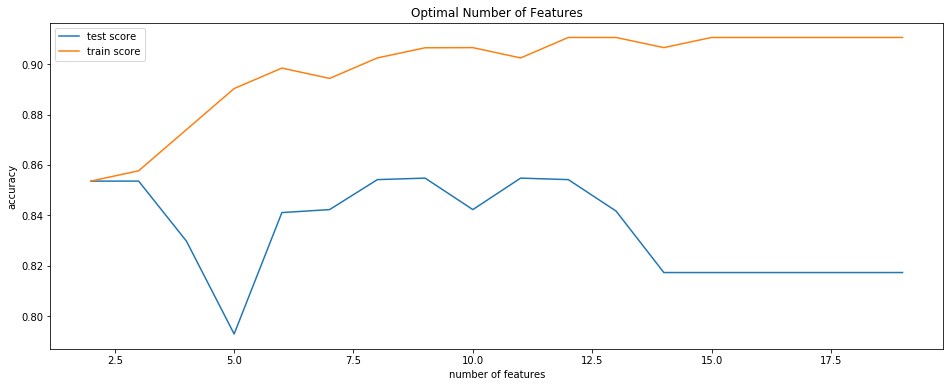

In [696]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('accuracy')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [697]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [698]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', False, 3),
 ('SNAmax', True, 1),
 ('SNAavg', True, 1),
 ('CD44max', False, 6),
 ('CD44avg', False, 5),
 ('SiteT_SNAmax', True, 1),
 ('SiteT_CD44Avg', True, 1),
 ('SNAmaxAVG', False, 2),
 ('SNAmax*Cd44max', True, 1),
 ('SNAavg*CD44max', True, 1),
 ('SNA_avg*CD44avg', True, 1),
 ('Sex _Male', True, 1),
 ('Habit_No_Habit', True, 1),
 ('site_Gingiva', False, 4),
 ('site_Tongue', True, 1)]

In [699]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['age', 'CD44max', 'CD44avg', 'SNAmaxAVG', 'site_Gingiva'], dtype='object')

In [700]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                disease   No. Observations:                   82
Model:                            GLM   Df Residuals:                       71
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 25 Nov 2020   Deviance:                          nan
Time:                        17:39:26   Pearson chi2:                     23.7
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9580   3.18e+06   -2.5e-06      1.000   -6.24e+06    6.24e+06
SNAmax              6.2393      3.765      1.657      0.097      -1.140      13.618
SNAavg             -8.4553      4.235     -1.996      0.046     -16.757      -0.154
SiteT_SNAmax       19.3192     32.996      0.585      0.558     -45.352      83.991
SiteT_CD44Avg      -5.3899      5.898     -0.914      0.361     -16.950       6.171
SNAmax*Cd44max     -8.6348      9.715     -0.889      0.374     -27.675      10.406
SNAavg*CD44max     12.1333     14.444      0.840      0.401     -16.176      40.442
SNA_avg*CD44avg     1.7562      5.438      0.323      0.747      -8.902      12.415
Sex _Male           1.1045      0.773      1.428      0.153      -0.411       2.620
Habit_No_Habit    -22.8939   5.92e+06  -3.86e-06      1.000   -1.16e+07    1.16e+07
site_Tongue        10.6116   4.81e+06   2.21e-06      1.000   -9.43e+06    9.43e+06
===================================================================================
"""

In [701]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [702]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,SNAavg*CD44max,41.72
4,SNAmax*Cd44max,26.69
0,SNAmax,15.63
1,SNAavg,15.42
6,SNA_avg*CD44avg,13.14
2,SiteT_SNAmax,5.23
3,SiteT_CD44Avg,3.97
9,site_Tongue,3.66
8,Habit_No_Habit,1.81
7,Sex _Male,1.21


In [703]:
#removing High VIF Variable
col = col.drop(['Sex _Male','SNAavg*CD44max'], 1)
col

Index(['SNAmax', 'SNAavg', 'SiteT_SNAmax', 'SiteT_CD44Avg', 'SNAmax*Cd44max',
       'SNA_avg*CD44avg', 'Habit_No_Habit', 'site_Tongue'],
      dtype='object')

In [721]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                disease   No. Observations:                   82
Model:                            GLM   Df Residuals:                       77
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21.918
Date:                Wed, 25 Nov 2020   Deviance:                       43.837
Time:                        17:44:07   Pearson chi2:                     71.5
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0515      0.456      0.113      0.910      -0.842       0.945
SNAmax              3.1753      1.207      2.631      0.009       0.810       5.541
SNAavg             -4.3065      1.493     -2.884      0.004      -7.233      -1.380
SNA_avg*CD44avg     3.8404      1.248      3.077      0.002       1.394       6.286
Habit_No_Habit     -2.3179      0.574     -4.039      0.000      -3.443      -1.193
===================================================================================
"""

In [722]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,SNAavg,5.83
0,SNAmax,4.26
2,SNA_avg*CD44avg,2.23
3,Habit_No_Habit,1.62


In [719]:
#removing High VIF Variable removed= SNAmax,SNAmaxAVG, 	SNA_avg*CD44avg
col = col.drop(['SiteT_CD44Avg'], 1)
col

Index(['SNAmax', 'SNAavg', 'SNA_avg*CD44avg', 'Habit_No_Habit'], dtype='object')

In [723]:
# Checking Pseudo R2 of train data 
logit_model=sm.Logit(list(y_train),X_train[col])
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.267375
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   82
Model:                          Logit   Df Residuals:                       78
Method:                           MLE   Df Model:                            3
Date:                Wed, 25 Nov 2020   Pseudo R-squ.:                  0.6101
Time:                        17:44:23   Log-Likelihood:                -21.925
converged:                       True   LL-Null:                       -56.227
Covariance Type:            nonrobust   LLR p-value:                 8.495e-15
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
SNAmax              3.1361      1.154      2.719      0.007       0.875       5.397
SNAavg        

In [724]:
logreg = LogisticRegression(class_weight = 'balanced')
logreg.fit(X_train[col], y_train)

LogisticRegression(class_weight='balanced')

In [725]:
y_pred = logreg.predict(X_test[col])

In [726]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                disease   No. Observations:                   82
Model:                            GLM   Df Residuals:                       77
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21.918
Date:                Wed, 25 Nov 2020   Deviance:                       43.837
Time:                        17:44:24   Pearson chi2:                     71.5
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0515      0.456      0.113      0.910      -0.842       0.945
SNAmax              3.1753      1.207      2.631      0.009       0.810       5.541
SNAavg             -4.3065      1.493     -2.884      0.004      -7.233      -1.380
SNA_avg*CD44avg     3.8404      1.248      3.077      0.002       1.394       6.286
Habit_No_Habit     -2.3179      0.574     -4.039      0.000      -3.443      -1.193
===================================================================================
"""

In [727]:
print ('Accuracy {}'.format (metrics.accuracy_score(y_test, y_pred)))
print ('sensitivity {}'.format (metrics.recall_score(y_test, y_pred)))

Accuracy 0.8214285714285714
sensitivity 0.875


In [728]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9      0.975105
47     0.844958
81     0.620351
71     0.132886
79     0.494453
46     0.078982
102    0.018704
54     0.002006
28     0.917943
13     0.657372
dtype: float64

In [729]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97510523, 0.84495834, 0.62035072, 0.13288625, 0.49445267,
       0.07898163, 0.0187041 , 0.00200611, 0.91794261, 0.65737196])

In [730]:
y_train_pred_final = pd.DataFrame({'Disease':y_train.values, 'Disease_Prob':y_train_pred})
y_train_pred_final['StudyID'] = y_train.index
y_train_pred_final.head()

,Disease,Disease_Prob,StudyID
0,1,0.975105,9
1,1,0.844958,47
2,1,0.620351,81
3,0,0.132886,71
4,1,0.494453,79


In [731]:
y_train_pred_final['predicted'] = y_train_pred_final.Disease_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Disease,Disease_Prob,StudyID,predicted
0,1,0.975105,9,1
1,1,0.844958,47,1
2,1,0.620351,81,1
3,0,0.132886,71,0
4,1,0.494453,79,0


In [732]:
# Let's check the overall accuracy of train data
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.Disease, y_train_pred_final.predicted))

0.9024390243902439


In [733]:
confusion = metrics.confusion_matrix(y_train_pred_final.Disease, y_train_pred_final.predicted )
confusion

array([[42,  4],
       [ 4, 32]], dtype=int64)

In [734]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [735]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8888888888888888

In [736]:
# Let us calculate specificity
TN / float(TN+FP)

0.9130434782608695

In [737]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [738]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Disease, y_train_pred_final.Disease_Prob, drop_intermediate = False )

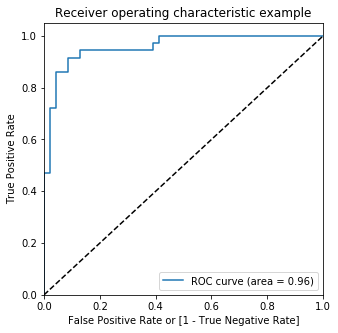

In [739]:
draw_roc(y_train_pred_final.Disease, y_train_pred_final.Disease_Prob)

In [740]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Disease_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Disease,Disease_Prob,StudyID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.975105,9,1,1,1,1,1,1,1,1,1,1,1
1,1,0.844958,47,1,1,1,1,1,1,1,1,1,1,0
2,1,0.620351,81,1,1,1,1,1,1,1,1,0,0,0
3,0,0.132886,71,0,1,1,0,0,0,0,0,0,0,0
4,1,0.494453,79,0,1,1,1,1,1,0,0,0,0,0


In [741]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Disease, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

<Figure size 288x432 with 0 Axes>

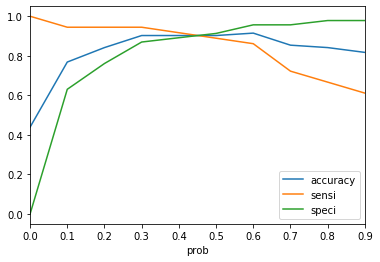

In [742]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize =(4,6))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [833]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Disease_Prob.map( lambda x: 1 if x > 0.56 else 0)

y_train_pred_final.head()

,Disease,Disease_Prob,StudyID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.975105,9,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.844958,47,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.620351,81,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.132886,71,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.494453,79,0,1,1,1,1,1,0,0,0,0,0,0


In [834]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Disease, y_train_pred_final.final_predicted)

0.9024390243902439

In [835]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Disease, y_train_pred_final.final_predicted )
confusion2

array([[43,  3],
       [ 5, 31]], dtype=int64)

In [836]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [837]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8611111111111112

In [838]:
# Let us calculate specificity
TN / float(TN+FP)

0.9347826086956522

In [839]:
X_test_sm =sm.add_constant(X_test[col])

In [840]:
y_test_pred = res.predict(X_test_sm)

In [841]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['StudyID'] = y_test_df.index

In [842]:
y_pred_1.reset_index(drop =True, inplace = True)
y_test_df.reset_index (drop =True, inplace= True)
y_pre_final = pd.concat([y_test_df, y_pred_1], axis =1)
y_pred_final = y_pre_final.rename (columns= {0:'Disease_Prob'})

In [851]:
y_pred_final ['final_predicted']= y_pred_final.Disease_Prob.map(lambda x: 1if x> 0.56 else 0)

In [852]:
y_pred_final.head(5)

,disease,StudyID,Disease_Prob,final_predicted
0,0,44,0.064051,0
1,1,59,0.217028,0
2,0,119,0.014526,0
3,1,33,0.616323,1
4,0,53,0.005794,0


In [853]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.disease, y_pred_final.final_predicted)

0.8214285714285714

In [854]:
confusion2 = metrics.confusion_matrix(y_pred_final.disease, y_pred_final.final_predicted )
confusion2

array([[27,  5],
       [ 5, 19]], dtype=int64)

In [855]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [856]:
# Let's see the sensitivity of our logistic regression model
Recall = TP / float(TP+FN)
Recall

0.7916666666666666

In [857]:
# Let us calculate specificity
TN / float(TN+FP)

0.84375

In [858]:
# Checking Pseudo R2 of train data 
logit_model=sm.Logit(list(y_train),X_train[col])
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.267375
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   82
Model:                          Logit   Df Residuals:                       78
Method:                           MLE   Df Model:                            3
Date:                Wed, 25 Nov 2020   Pseudo R-squ.:                  0.6101
Time:                        17:48:17   Log-Likelihood:                -21.925
converged:                       True   LL-Null:                       -56.227
Covariance Type:            nonrobust   LLR p-value:                 8.495e-15
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
SNAmax              3.1361      1.154      2.719      0.007       0.875       5.397
SNAavg        

In [1128]:
#KNN

In [860]:
from sklearn.neighbors import KNeighborsClassifier

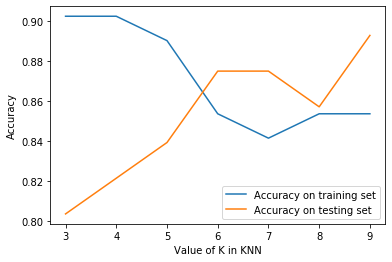

In [861]:
k_range = range(3, 10, 1)
score1=[]
score2=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k )
    knn.fit(X_train,y_train)
    score1.append(knn.score(X_train,y_train))
    score2.append(knn.score(X_test,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [986]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
print('Accuracy of KNN n=9 on the testing dataset is :{:.3f}'.format(knn.score(X_test,y_test)))

Accuracy of KNN n=9 on the testing dataset is :0.893


In [987]:
predict= knn.predict(X_test)

In [988]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.91      0.83      0.87        24

    accuracy                           0.89        56
   macro avg       0.90      0.89      0.89        56
weighted avg       0.89      0.89      0.89        56



In [989]:
y_train_predict= knn.predict(X_train)

In [990]:
confusion  =(metrics.confusion_matrix(y_train, y_train_predict))
confusion

array([[42,  4],
       [ 8, 28]], dtype=int64)

In [991]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [992]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7777777777777778

In [993]:
# Let us calculate specificity
TN / float(TN+FP)

0.9130434782608695

In [994]:
#Test

In [995]:
confusion  =(metrics.confusion_matrix(y_test, predict))
confusion

array([[30,  2],
       [ 4, 20]], dtype=int64)

In [996]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [997]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8333333333333334

In [998]:
# Let us calculate specificity
TN / float(TN+FP)

0.9375

In [999]:
#Recall and precision 
recall = TP / float(TP+FN)
precision = TP/(TP+FP)
print(recall)
print(precision)

0.8333333333333334
0.9090909090909091


In [1000]:
print('AUC score for Svm after parameter tuning :', roc_auc_score(y_test, predict))

AUC score for Svm after parameter tuning : 0.8854166666666667


In [1240]:
#XgBoost

In [1001]:
from xgboost import XGBClassifier

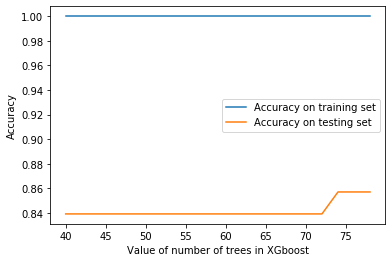

In [1002]:
tree_range = range(40, 80, 2)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [1003]:
#These variable were tuned in Google colab and selected best Hyperparameter
xgb_param = {'n_estimators':[50, 55,60,65, 70, 75,80],            # no. of iteation or tree
             'learning_rate':[0.01, 0.020,0.030,0.040],        # learning rate 
             'max_depth':[3,4,5,6],                   # max depth of a tree
             'min_child_weight':[1,2,3,4],            # minimum sum of weights of all observations
             'gamma':[0.1,0.2,0.3],                   # minimum loss reduction required 
             'colsample_bytree':[0.2,0.3,0.5],        # fraction of random columns  
             'booster':['gbtree'],                    # gbtree: tree-based model
             'objective':['binary:logistic']}         # binary classification prblm

In [1004]:
xgb_cfl =XGBClassifier(n_jobs = -1)
CV_xgb_cfl = GridSearchCV (estimator = xgb_cfl, param_grid = xgb_param,scoring='roc_auc', n_jobs=-1, verbose=1)

CV_xgb_cfl.fit(X_train, y_train)

best_parameters = CV_xgb_cfl.best_params_
print("The best parameters for using this model is", best_parameters)

Fitting 5 folds for each of 4032 candidates, totalling 20160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 2198 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 4298 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 6998 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 10298 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 14198 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 18698 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 20160 out of 20160 | elapsed:  1.3min finished


The best parameters for using this model is {'booster': 'gbtree', 'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.04, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 60, 'objective': 'binary:logistic'}


In [1045]:
xgb = XGBClassifier(n_estimators=55,
                        max_depth=3,
                        learning_rate=0.04,
                        colsample_bytree=0.5,
                        gamma=0.2,
                        min_child_weight=3,
                        objective='binary:logistic',
                        n_jobs=-1,
                        booster='gbtree')

In [1025]:
#xgb = XGBClassifier(n_estimators=60,
 #                       max_depth=3,
 #                       learning_rate=0.04,
 #                       colsample_bytree=0.5,
 #                       gamma=0.1,
 #                       min_child_weight=2,
 #                       objective='binary:logistic',
 #                       n_jobs=-1,
 #                       booster='gbtree')#

In [1046]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.04, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=55, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1047]:
xgb_bst_proba = xgb.predict_proba(X_test)[:,1]

In [1048]:
from sklearn.metrics import roc_auc_score,roc_curve

In [1049]:
xgb_fpr, xgb_tpr, xgb_thrs = roc_curve(y_test,xgb_bst_proba)

Text(0.5, 1.0, 'Receiver Operating Characteristics (ROC) ')

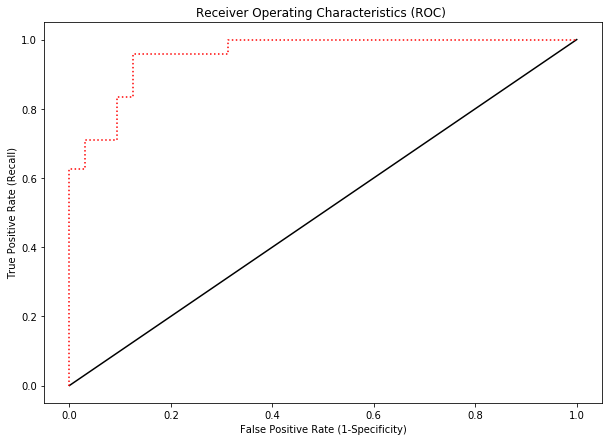

In [1050]:
# plotting ROC
plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],'k')
plt.plot(xgb_fpr,xgb_tpr,':', color='red')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristics (ROC) ')

In [1051]:
print('AUC score for XGboost after parameter tuning :', roc_auc_score(y_test,xgb_bst_proba))

AUC score for XGboost after parameter tuning : 0.95703125


In [1052]:
xgb_train_pred= xgb.predict(X_train)

In [1053]:
confusion  =(metrics.confusion_matrix(y_train,xgb_train_pred))
confusion

array([[44,  2],
       [ 5, 31]], dtype=int64)

In [1054]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1055]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8611111111111112

In [1056]:
# Let us calculate specificity
TN / float(TN+FP)

0.9565217391304348

In [1057]:
#Recall and precision 
recall = TP / float(TP+FN)
precision = TP/(TP+FP)
print(recall)
print(precision)

0.8611111111111112
0.9393939393939394


In [1058]:
#Test

In [1059]:
xgb_pre = xgb.predict(X_test)

In [1060]:
confusion  =(metrics.confusion_matrix(y_test,xgb_pre))
confusion

array([[29,  3],
       [ 4, 20]], dtype=int64)

In [1061]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1062]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8333333333333334

In [1063]:
# Let us calculate specificity
TN / float(TN+FP)

0.90625

In [1064]:
#Recall and precision 
recall = TP / float(TP+FN)
precision = TP/(TP+FP)
print(recall)
print(precision)

0.8333333333333334
0.8695652173913043
